# Drug Allergy Prediction

Given different kinds of clinical data, predict drug rechallenge results of patients.

The dataset contains 16 feature columns and a target column:

1. Patient ID
2. Gender
3. Age
4. ELISpot Control
5. ELISpot Result
6. Naranjo Score
7. Naranjo Category
8. Exposure Time
9. Steroid Usage
10. Anonymous Underlying Condition A-E
11. Suspicion Score
12. Allergic reaction group
13. Drug group
14. Target column: Drug rechallenge result

# Import Libraries and file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('DrugAllergyKaggle_v3_050720.csv')

# Data Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               799 non-null    int64  
 1   Gender                   799 non-null    int64  
 2   Age_Year                 799 non-null    int64  
 3   ELISpot_Control          799 non-null    int64  
 4   ELISpot_Result           798 non-null    float64
 5   Naranjo_Score            431 non-null    float64
 6   Naranjo_Category         509 non-null    float64
 7   Exposure_Time            622 non-null    float64
 8   Steroid_Usage            799 non-null    int64  
 9   Underlying_Condition_A   781 non-null    float64
 10  Underlying_Condition_B   799 non-null    int64  
 11  Underlying_Condition_C   799 non-null    int64  
 12  Underlying_Condition_D   785 non-null    float64
 13  Underlying_Condition_E   798 non-null    float64
 14  Suspicion_Score          7

In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Patient_ID,799.0,375.077597,144.888087,2.0,318.0,403.0,486.0,570.0
Gender,799.0,0.565707,0.495974,0.0,0.0,1.0,1.0,1.0
Age_Year,799.0,51.012516,22.344643,0.0,36.0,53.0,70.0,97.0
ELISpot_Control,799.0,1698.603254,879.909460,60.0,1120.0,1592.0,2166.0,5290.0
ELISpot_Result,798.0,11.973684,51.111000,0.0,0.0,0.0,0.0,554.0
Naranjo_Score,431.0,3.236659,1.796548,-3.0,2.0,3.0,4.0,9.0
Naranjo_Category,509.0,1.198428,0.519234,0.0,1.0,1.0,1.0,3.0
Exposure_Time,622.0,428.533762,3922.748736,-9.0,3.0,10.5,21.0,43281.0
Steroid_Usage,799.0,0.354193,0.478568,0.0,0.0,0.0,1.0,1.0
Underlying_Condition_A,781.0,0.070423,0.256022,0.0,0.0,0.0,0.0,1.0


In [5]:
data.corr()

,Patient_ID,Gender,Age_Year,ELISpot_Control,ELISpot_Result,Naranjo_Score,Naranjo_Category,Exposure_Time,Steroid_Usage,Underlying_Condition_A,Underlying_Condition_B,Underlying_Condition_C,Underlying_Condition_D,Underlying_Condition_E,Suspicion_Score,Allergic_Reaction_Group,Drug_Group,Drug_Rechallenge_Result
Patient_ID,1.000000,0.035643,-0.131319,-0.467507,-0.060285,0.121137,-0.047406,-0.098100,0.033742,-0.079929,-0.010747,-0.070237,-0.016512,-0.102436,-0.022442,0.075733,0.188645,-0.107253
Gender,0.035643,1.000000,-0.033997,0.030470,-0.008815,0.075185,0.092706,-0.078202,0.047014,-0.040943,0.081963,-0.218907,-0.002183,-0.085985,-0.011751,0.135318,-0.088816,0.053926
Age_Year,-0.131319,-0.033997,1.000000,0.080074,-0.057247,0.004964,-0.039081,0.003507,0.008960,0.087780,0.033236,-0.166622,0.183292,0.042246,0.008570,0.123643,0.027591,-0.192368
ELISpot_Control,-0.467507,0.030470,0.080074,1.000000,0.115394,0.001344,0.027918,0.059975,-0.200589,0.188652,-0.014160,0.003388,-0.052436,0.015897,0.037844,-0.014115,-0.150553,0.065338
ELISpot_Result,-0.060285,-0.008815,-0.057247,0.115394,1.000000,-0.013339,0.025969,-0.020625,0.033202,-0.045819,0.071484,0.110968,-0.047252,-0.084204,-0.012840,-0.074845,0.053147,0.257566
Naranjo_Score,0.121137,0.075185,0.004964,0.001344,-0.013339,1.000000,0.866709,0.099665,0.033830,-0.012218,0.028130,-0.070400,-0.069327,-0.042662,-0.018981,-0.051182,0.068766,0.397708
Naranjo_Category,-0.047406,0.092706,-0.039081,0.027918,0.025969,0.866709,1.000000,0.029761,0.100705,-0.056929,0.049854,-0.029904,-0.010803,-0.013349,0.000000,-0.074830,0.095907,0.352240
Exposure_Time,-0.098100,-0.078202,0.003507,0.059975,-0.020625,0.099665,0.029761,1.000000,0.023216,-0.025987,0.013263,0.005724,0.123329,0.107565,0.089034,0.066859,0.044766,-0.094525
Steroid_Usage,0.033742,0.047014,0.008960,-0.200589,0.033202,0.033830,0.100705,0.023216,1.000000,-0.002365,0.197591,-0.117353,0.110212,-0.060854,-0.062043,-0.077100,0.150239,-0.073921
Underlying_Condition_A,-0.079929,-0.040943,0.087780,0.188652,-0.045819,-0.012218,-0.056929,-0.025987,-0.002365,1.000000,-0.010460,-0.086432,-0.067038,-0.085200,0.030254,0.042956,-0.090890,0.082576


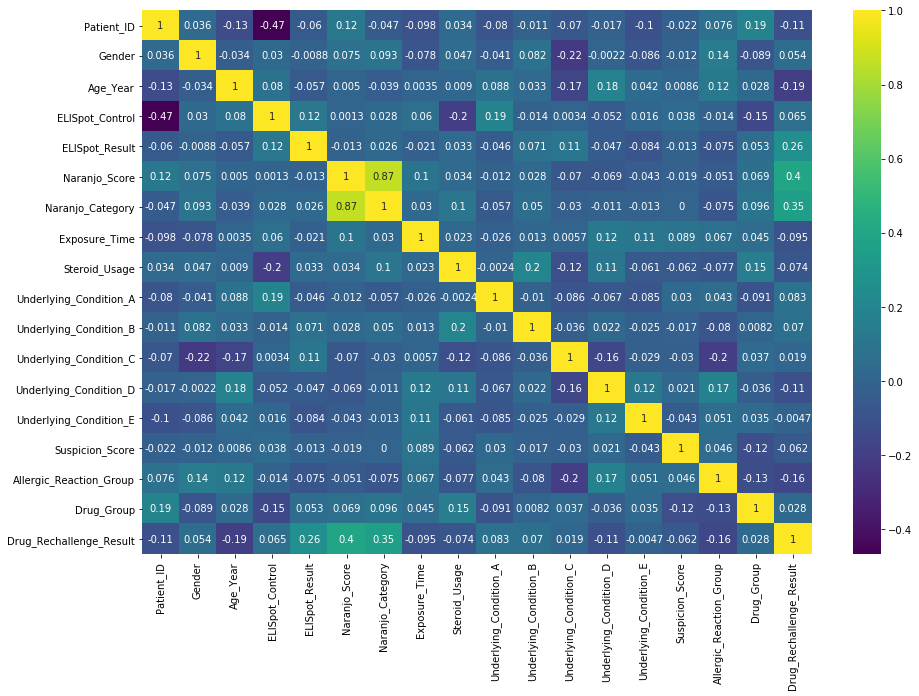

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap='viridis')

# Target Column : Drug Rechallenge Result

There are only 114 rows with ground truth values.

The major class is 0.

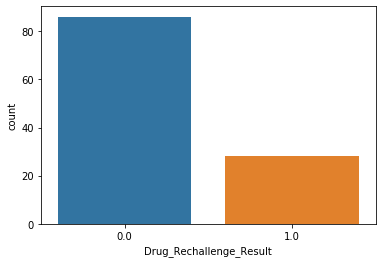

In [7]:
sns.countplot(data['Drug_Rechallenge_Result'])

# Data Preprocessing: Feature Engineering

# 1. Naranjo Category and Naranjo Score

There are 509 rows contains Naranjo category (63% of total)

And there are 431 rows contains Naranjo score.

Try to impute two columns with each other.

**1.1)Naranjo score is present and Naranjo category is absent**

In [8]:
data[(data['Naranjo_Category'].isnull()) & (data['Naranjo_Score'].notnull())][['Naranjo_Category','Naranjo_Score']]

,Naranjo_Category,Naranjo_Score
105,NaN,-3.0


**1.2)Naranjo score is absent and Naranjo category is present**

In [9]:
data[(data['Naranjo_Category'].notnull()) & (data['Naranjo_Score'].isnull())][['Naranjo_Category','Naranjo_Score']]

,Naranjo_Category,Naranjo_Score
17,2.0,NaN
22,2.0,NaN
25,2.0,NaN
31,2.0,NaN
32,1.0,NaN
...,...,...
769,1.0,NaN
770,1.0,NaN
778,3.0,NaN
780,3.0,NaN


**1. Impute Naranjo_Category of row105 with 0** 

Naranjo category is 0 to 3.

Naranjo score of -3 is equivalent to Naranjo category 0.

**2. Drop Naranjo_score column**

The Narnjo score and the Naranjo category are the same and collinearity.

I decide to drop Naranjo score column because the number of rows with missing value is higher than Naranjo category.

**3. Fill null value in Naranjo_Category with 1**

The mean value of Naranjo category is 1.19, and the mean Naranjo score is 3.26 (equivalent to Naranjo category1).

In [10]:
data.loc[105, 'Naranjo_Category'] = 0

In [11]:
data = data.drop('Naranjo_Score',axis=1)

In [12]:
data['Naranjo_Category'].fillna(value=1,inplace=True)

# 2. Exposure time

There are 622 rows contains exposure time(78% of total).

In [13]:
data['Exposure_Time'].value_counts(sort=True,ascending=False)

 1.0      64
 2.0      39
 0.0      38
 3.0      29
 10.0     25
          ..
 90.0      1
 29.0      1
 41.0      1
 225.0     1
-3.0       1
Name: Exposure_Time, Length: 77, dtype: int64

In [14]:
data['Exposure_Time'].median()

10.5

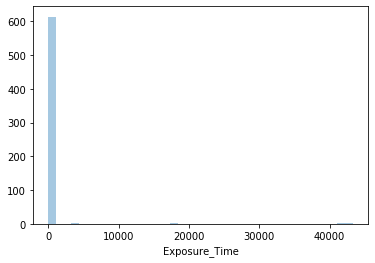

In [15]:
sns.distplot(data['Exposure_Time'],kde=False,bins=40)

(0, 200)

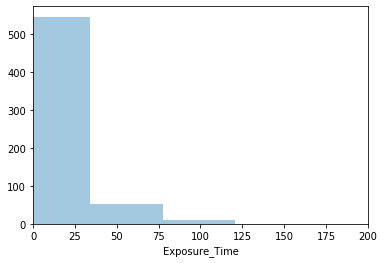

In [16]:
sns.distplot(data['Exposure_Time'],kde=False,bins=1000)

plt.xlim(0,200)

**1. Replace the values below 0 with 0**

Time cannot be below 0. So, replace the values below 0 with 0.

**2. Replace the values >120 with 120**

Exposure time range from -9 to 43281.0, but most of the values are between 0-120.

**3. Replace the rest of the null values with the median value**

In [17]:
data[data['Exposure_Time']< 0]['Exposure_Time'] 

186   -3.0
789   -9.0
Name: Exposure_Time, dtype: float64

In [18]:
data.loc[186, 'Exposure_Time'] = 0
data.loc[789, 'Exposure_Time'] = 0

In [19]:
data[data['Exposure_Time'] > 120]['Exposure_Time']

115      731.0
123    42038.0
148    42038.0
156    42038.0
272      236.0
471     3653.0
472     3653.0
548    42443.0
566      135.0
577    43281.0
594      225.0
699      300.0
738    18250.0
760    18250.0
761      180.0
Name: Exposure_Time, dtype: float64

In [20]:
data.loc[(data['Exposure_Time'] > 120),['Exposure_Time']] =120

In [21]:
data['Exposure_Time'].fillna(value=10.5,inplace=True)

# 3. Underlying condition

There are few missing values in underlying condition columns(1-18 points per column).

The values are 0 and 1 indicate present and absent of conditions.

Assume missing values are absent of that condition.

In [22]:
data['Underlying_Condition_A'].fillna(value=0,inplace=True)
data['Underlying_Condition_D'].fillna(value=0,inplace=True)
data['Underlying_Condition_E'].fillna(value=0,inplace=True)

# 4. Allergic reaction group

There are 28 missing values(3.5% of total).

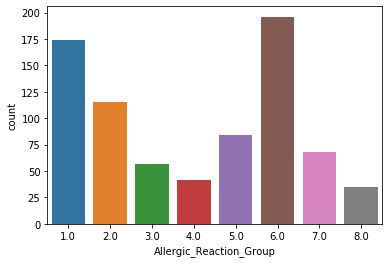

In [23]:
sns.countplot(x='Allergic_Reaction_Group',data=data)

**Drop rows with missing values**

In [24]:
data = data[data['Allergic_Reaction_Group'].notnull()]

# 5. ELISpot

There is a row with missing ELISpot_Result.

**Drop the row with missing value**

In [25]:
data = data[data['ELISpot_Result'].notnull()]

# ELISpot ratio

Given ELISpot control and result, convert to ELISpot ratio.

**ELISpot ratio = result/control**

In [26]:
data['elis_ratio'] = data['ELISpot_Result']/data['ELISpot_Control']

**Drop ELISpot_control and ELISpot_result columns**

In [27]:
data = data.drop('ELISpot_Control',axis=1)
data = data.drop('ELISpot_Result',axis=1)

# 6. Explore the Rest Features

**Gender**

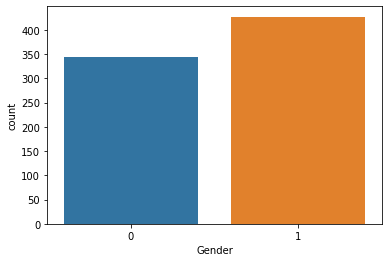

In [28]:
sns.countplot(data['Gender'])

**Age**

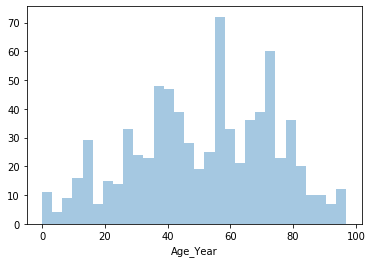

In [29]:
sns.distplot(data['Age_Year'],kde=False,bins=30)

**Steroid Usage**

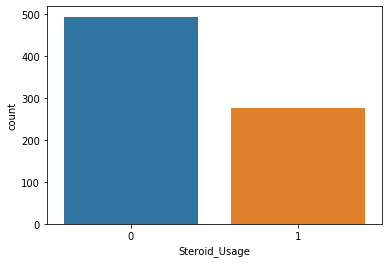

In [30]:
sns.countplot(data['Steroid_Usage'])

**Suspicion Score**

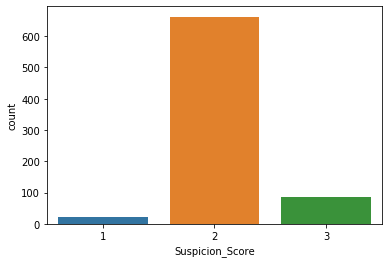

In [31]:
sns.countplot(data['Suspicion_Score'])

**Drug Group**

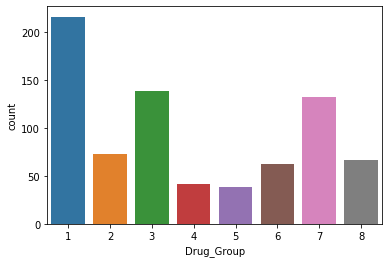

In [32]:
sns.countplot(data['Drug_Group'])

# 7. Transform Categorical Variables to Dummies Variables

In [33]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

In [34]:
categorical_features = ['Gender','Naranjo_Category','Steroid_Usage','Underlying_Condition_A','Underlying_Condition_B',
                       'Underlying_Condition_C','Underlying_Condition_D','Underlying_Condition_E', 'Suspicion_Score', 
                       'Allergic_Reaction_Group', 'Drug_Group']

for col in categorical_features:
    data = create_dummies(data,col)
    data = data.drop(col,axis=1)

In [35]:
data = data.drop(['Gender_0','Steroid_Usage_0', 'Underlying_Condition_A_0.0','Underlying_Condition_B_0',
                  'Underlying_Condition_C_0','Underlying_Condition_D_0.0','Underlying_Condition_E_0.0'],axis=1)

In [36]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Patient_ID,770.0,371.910390,145.084984,2.0,313.0,401.0,482.0,570.000000
Age_Year,770.0,51.264935,22.331757,0.0,36.0,54.0,70.0,97.000000
Exposure_Time,770.0,16.051948,20.890993,0.0,5.0,10.5,17.0,120.000000
Drug_Rechallenge_Result,114.0,0.245614,0.432351,0.0,0.0,0.0,0.0,1.000000
elis_ratio,770.0,0.006733,0.029677,0.0,0.0,0.0,0.0,0.543317
Gender_1,770.0,0.554545,0.497339,0.0,0.0,1.0,1.0,1.000000
Naranjo_Category_0.0,770.0,0.028571,0.166707,0.0,0.0,0.0,0.0,1.000000
Naranjo_Category_1.0,770.0,0.824675,0.380492,0.0,1.0,1.0,1.0,1.000000
Naranjo_Category_2.0,770.0,0.137662,0.344769,0.0,0.0,0.0,0.0,1.000000
Naranjo_Category_3.0,770.0,0.009091,0.094974,0.0,0.0,0.0,0.0,1.000000


# Train/Test Split

Assign 'data_ready' is the data frame with ground truth values.

Assign 'data_for_predict' is the data frame with missing ground truth.

In [37]:
data_ready = data[data['Drug_Rechallenge_Result'].notnull()]
id_ready = data_ready['Patient_ID']
data_ready = data_ready.drop('Patient_ID',axis=1)

In [38]:
data_for_predict = data[data['Drug_Rechallenge_Result'].isnull()]
id_prediction_set = data_for_predict['Patient_ID']
data_for_predict = data_for_predict.drop('Patient_ID',axis=1)
data_for_predict = data_for_predict.drop('Drug_Rechallenge_Result',axis=1)

In [39]:
all_y = data_ready['Drug_Rechallenge_Result']
all_x = data_ready.drop('Drug_Rechallenge_Result',axis=1)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(all_x, all_y, test_size=0.2, random_state=1)

# Normalizing Data

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler = MinMaxScaler()

In [44]:
scaler.fit(x_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [45]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Creating Models : 1. Logistic Regression 

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
lr = LogisticRegression()

In [48]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
predictions = lr.predict(x_test)

# Model evaluation

In [50]:
from sklearn.metrics import classification_report,confusion_matrix

In [51]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        16
         1.0       1.00      0.86      0.92         7

    accuracy                           0.96        23
   macro avg       0.97      0.93      0.95        23
weighted avg       0.96      0.96      0.96        23



In [52]:
print(confusion_matrix(y_test,predictions))

[[16  0]
 [ 1  6]]


# Creating Models: 2. Neural Network

In [53]:
x_train.shape

(91, 33)

In [54]:
y_train = y_train.values

In [55]:
import tensorflow as tf

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [57]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [58]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=20)
check_point = ModelCheckpoint('drug_allergy_weight.hdf5', monitor='val_accuracy',save_best_only=True)

In [59]:
model = Sequential()

model.add(Dense(units=33,activation='relu'))
model.add(Dense(units=10,activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [60]:
model.fit(x=x_train,y=y_train,epochs=300,validation_data=(x_test,y_test),verbose=1,callbacks=[early_stop,check_point])

Train on 91 samples, validate on 23 samples
Epoch 1/300
91/91 [==============================] - 1s 6ms/sample - loss: 0.6237 - accuracy: 0.7582 - val_loss: 0.6693 - val_accuracy: 0.6957
Epoch 2/300
91/91 [==============================] - 0s 142us/sample - loss: 0.6057 - accuracy: 0.7692 - val_loss: 0.6607 - val_accuracy: 0.6957
Epoch 3/300
91/91 [==============================] - 0s 132us/sample - loss: 0.5937 - accuracy: 0.7692 - val_loss: 0.6519 - val_accuracy: 0.6957
Epoch 4/300
91/91 [==============================] - 0s 142us/sample - loss: 0.5813 - accuracy: 0.7692 - val_loss: 0.6441 - val_accuracy: 0.6957
Epoch 5/300
91/91 [==============================] - 0s 132us/sample - loss: 0.5707 - accuracy: 0.7692 - val_loss: 0.6377 - val_accuracy: 0.6957
Epoch 6/300
91/91 [==============================] - 0s 142us/sample - loss: 0.5597 - accuracy: 0.7692 - val_loss: 0.6324 - val_accuracy: 0.6957
Epoch 7/300
91/91 [==============================] - 0s 175us/sample - loss: 0.5509 - ac

Epoch 57/300
91/91 [==============================] - 0s 108us/sample - loss: 0.3970 - accuracy: 0.8022 - val_loss: 0.4458 - val_accuracy: 0.6957
Epoch 58/300
91/91 [==============================] - 0s 111us/sample - loss: 0.3953 - accuracy: 0.8022 - val_loss: 0.4421 - val_accuracy: 0.6957
Epoch 59/300
91/91 [==============================] - 0s 116us/sample - loss: 0.3926 - accuracy: 0.8022 - val_loss: 0.4404 - val_accuracy: 0.6957
Epoch 60/300
91/91 [==============================] - 0s 126us/sample - loss: 0.3900 - accuracy: 0.8022 - val_loss: 0.4378 - val_accuracy: 0.6957
Epoch 61/300
91/91 [==============================] - 0s 113us/sample - loss: 0.3876 - accuracy: 0.8022 - val_loss: 0.4342 - val_accuracy: 0.6957
Epoch 62/300
91/91 [==============================] - 0s 109us/sample - loss: 0.3850 - accuracy: 0.8022 - val_loss: 0.4310 - val_accuracy: 0.6957
Epoch 63/300
91/91 [==============================] - 0s 121us/sample - loss: 0.3825 - accuracy: 0.8022 - val_loss: 0.4288 -

91/91 [==============================] - 0s 105us/sample - loss: 0.2546 - accuracy: 0.9011 - val_loss: 0.3473 - val_accuracy: 0.7826
Epoch 114/300
91/91 [==============================] - 0s 112us/sample - loss: 0.2515 - accuracy: 0.9011 - val_loss: 0.3437 - val_accuracy: 0.7826
Epoch 115/300
91/91 [==============================] - 0s 113us/sample - loss: 0.2492 - accuracy: 0.9121 - val_loss: 0.3409 - val_accuracy: 0.7826
Epoch 116/300
91/91 [==============================] - 0s 113us/sample - loss: 0.2465 - accuracy: 0.9121 - val_loss: 0.3410 - val_accuracy: 0.7826
Epoch 117/300
91/91 [==============================] - 0s 112us/sample - loss: 0.2439 - accuracy: 0.9121 - val_loss: 0.3407 - val_accuracy: 0.7826
Epoch 118/300
91/91 [==============================] - 0s 106us/sample - loss: 0.2417 - accuracy: 0.9121 - val_loss: 0.3401 - val_accuracy: 0.7826
Epoch 119/300
91/91 [==============================] - 0s 123us/sample - loss: 0.2389 - accuracy: 0.9231 - val_loss: 0.3399 - val_ac

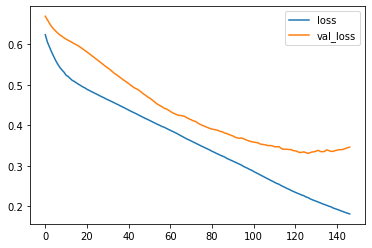

In [61]:
nn_model_loss = pd.DataFrame(model.history.history)
nn_model_loss['loss'].plot()
nn_model_loss['val_loss'].plot()
plt.legend()

In [62]:
nn_predictions = model.predict_classes(x_test)

**Model Evaluation**

In [63]:
print(classification_report(y_test,nn_predictions))

              precision    recall  f1-score   support

         0.0       0.79      0.94      0.86        16
         1.0       0.75      0.43      0.55         7

    accuracy                           0.78        23
   macro avg       0.77      0.68      0.70        23
weighted avg       0.78      0.78      0.76        23



In [64]:
print(confusion_matrix(y_test,nn_predictions))

[[15  1]
 [ 4  3]]


# Predict Missing Ground Truth Values

(data_for_predict set)

In [65]:
data_for_predict = scaler.transform(data_for_predict)

In [66]:
predict_missing = lr.predict(data_for_predict)

In [67]:
submission_df = {'Patient_ID':id_prediction_set,'Drug_Rechallenge_predict':predict_missing}

In [68]:
submission = pd.DataFrame(submission_df)

In [69]:
#submission.to_csv('submission_drug_allergy.csv',index=False)

# Summary

In use case applications, clinicians discuss with patients whether to use the drug by weighing the benefits of drugs and the chance of adverse drug allergy occurs.

The f1-score of 1 is a good factor to tell which model is better. 

The logistic regression model is better in this case at the f1 score of 0.92.